In [1]:
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [3]:

n_neighbors = 3
random_state = 0

# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,
                     random_state=random_state)

dim = len(X[0])
n_classes = len(np.unique(y))
dim, n_classes

(64, 10)

In [21]:
# redução de dimensionalidade para 2 com PCA, o make pipeline compara com o Satantard
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=5, random_state=random_state))

In [22]:
# redução de dimensionalidade para 2 com LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=5))



In [23]:
# redução de dimensionalidade para 2 com NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=5,
                                                   random_state=random_state))



In [24]:
# Usando o KNN para avaliar os métodos
knn = KNeighborsClassifier(n_neighbors=n_neighbors)



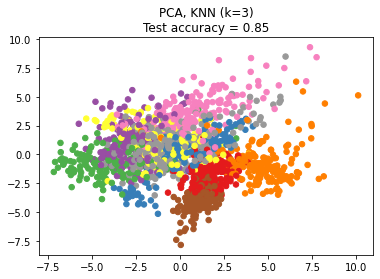

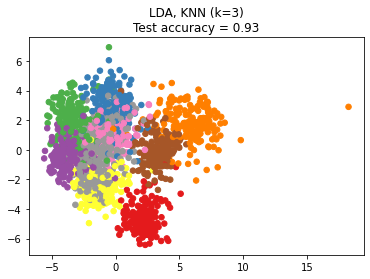

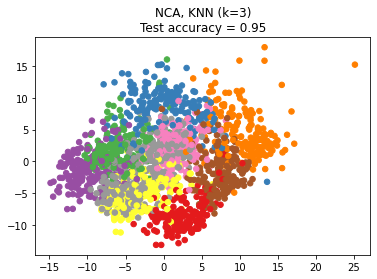

In [25]:
# lista de métodos para comparar
dim_reduction_methods = [('PCA', pca), ('LDA', lda), ('NCA', nca)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()

    # Ajustando o modelo ao método
    model.fit(X_train, y_train)

    # Ajustando o vizinho mais próximo ao conjunto de treino
    knn.fit(model.transform(X_train), y_train)

    # Computando a acurácia do KNN  no conjutno de teste
    acc_knn = knn.score(model.transform(X_test), y_test)

    # embutindo o dataset em duas diensões usando o modelo ajustado
    X_embedded = model.transform(X)

    # Plotando o conjunto de pontos projetados e mostrando a avaliação
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn))
plt.show()